In [2]:
from gensim.models import Word2Vec

In [1]:
import pandas as pd
import numpy as np
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
data = pd.read_csv('Datasets/datasiap.csv')

In [4]:
data = data.drop(['Unnamed: 0','Ingredient','Manufacturers','from','to','index'], axis=1)
data.head(4)

,Labeling,Product
0,0,"3 ayam mie telor super merah, tepung terigu, g..."
1,0,"3 ayam mie telor super merah, tepung terigu, g..."
2,0,"3 ayam mie telor super merah, tepung terigu, g..."
3,0,"3 ayam mie telor super merah, tepung terigu, g..."


In [5]:
#Remove spec character
spec_chars = [","]
for char in spec_chars:
    data['Product'] = data['Product'].str.replace(char, '')
data.head(5)

,Labeling,Product
0,0,3 ayam mie telor super merah tepung terigu gar...
1,0,3 ayam mie telor super merah tepung terigu gar...
2,0,3 ayam mie telor super merah tepung terigu gar...
3,0,3 ayam mie telor super merah tepung terigu gar...
4,0,3 ayam mie telor super merah tepung terigu gar...


In [6]:
product = data['Product'].tolist()

In [16]:
w2vModel = Word2Vec(product, vector_size=100, window=5, min_count=5, workers=4, epochs=10)
w2vModel.train(product, total_examples=len(product),epochs=10)

(47099666, 263639850)

In [12]:
w2vModel.save('Word2Vec/modelw2v2.w2v')

In [7]:
w2vModel = Word2Vec.load('modelw2v2.w2v')

In [8]:
def vectorOfTweet(tokens, w2vModel):
    if not len(tokens):
        return np.zeros(100)
    
    v = list()
    for token in tokens:
        if token in w2vModel:
            # If there is a coresponding vector in the model, add it to the list
            v.append(w2vModel[token])
        else:
            # else, make a random one
            v.append((np.random.rand(100)*2 - 1)) # p.x. len(w2vModel['food']) 
    
    # Compute the mean vector
    summ = np.zeros(100) #
    for vector in v:
        summ += vector
    return summ/len(v)   

In [9]:
vectors = list()
# for every tweet
for index, row in data.iterrows():
    vectors.append(vectorOfTweet(data.loc[index,'Product'],w2vModel.wv))

# Save the vectors as a new column in the dataframe
data['w2v'] = pd.Series(vectors,index=data.index)

In [19]:
data

,Labeling,Product,w2v
0,0,3 ayam mie telor super merah tepung terigu gar...,"[0.28285328688160066, -0.048673204116282925, -..."
1,0,3 ayam mie telor super merah tepung terigu gar...,"[0.28285328688160066, -0.048673204116282925, -..."
2,0,3 ayam mie telor super merah tepung terigu gar...,"[0.28285328688160066, -0.048673204116282925, -..."
3,0,3 ayam mie telor super merah tepung terigu gar...,"[0.28285328688160066, -0.048673204116282925, -..."
4,0,3 ayam mie telor super merah tepung terigu gar...,"[0.28285328688160066, -0.048673204116282925, -..."
...,...,...,...
159680,0,yeos drink grass jelly air gula ekstrak cincau...,"[0.3477334006860548, -0.1995264576862053, -0.1..."
159681,0,yeos drink grass jelly air gula ekstrak cincau...,"[0.3477334006860548, -0.1995264576862053, -0.1..."
159682,0,yeos drink grass jelly air gula ekstrak cincau...,"[0.3477334006860548, -0.1995264576862053, -0.1..."
159683,0,yeos drink grass jelly air gula ekstrak cincau...,"[0.3477334006860548, -0.1995264576862053, -0.1..."


In [74]:
data.head()

,Labeling,Product,w2v
0,0,3 ayam mie telor super merah tepung terigu gar...,"[-0.8309542609799293, 0.011042217009009854, -0..."
1,0,3 ayam mie telor super merah tepung terigu gar...,"[-0.8309542609799293, 0.011042217009009854, -0..."
2,0,3 ayam mie telor super merah tepung terigu gar...,"[-0.8309542609799293, 0.011042217009009854, -0..."
3,0,3 ayam mie telor super merah tepung terigu gar...,"[-0.8309542609799293, 0.011042217009009854, -0..."
4,0,3 ayam mie telor super merah tepung terigu gar...,"[-0.8309542609799293, 0.011042217009009854, -0..."


In [84]:
#data1 = data['w2v']
data1.head()

0    [-0.8309542609799293, 0.011042217009009854, -0...
1    [-0.8309542609799293, 0.011042217009009854, -0...
2    [-0.8309542609799293, 0.011042217009009854, -0...
3    [-0.8309542609799293, 0.011042217009009854, -0...
4    [-0.8309542609799293, 0.011042217009009854, -0...
Name: w2v, dtype: object

In [73]:
data.to_csv('Word2Vec/jadiw2v.csv')

In [32]:
data.to_csv('Word2Vec.csv')

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

**Random Forest Classifier**

In [19]:
#RsnfomForest
RF = RandomForestClassifier()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [RF]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = data['w2v'].tolist()
        y = data['Labeling']

        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score Random Forest with Train size %.2f : %.4f" % (f, score_test1))
    
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision Random Forest with Train size %.2f : %.4f" % (f, score_test3))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall Random Forest with Train size %.2f : %.4f" % (f, score_test4))

            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy Random Forest with Train size %.2f : %.4f" % (f, score_test2))

F1-Score Random Forest with Train size 0.70 : 0.8782
Precision Random Forest with Train size 0.70 : 0.8759
Recall Random Forest with Train size 0.70 : 0.8805
Accuracy Random Forest with Train size 0.70 : 0.8781
F1-Score Random Forest with Train size 0.70 : 0.8407
Precision Random Forest with Train size 0.70 : 0.8627
Recall Random Forest with Train size 0.70 : 0.8197
Accuracy Random Forest with Train size 0.70 : 0.8978
F1-Score Random Forest with Train size 0.70 : 0.8015
Precision Random Forest with Train size 0.70 : 0.8073
Recall Random Forest with Train size 0.70 : 0.7959
Accuracy Random Forest with Train size 0.70 : 0.9058


**Support Vector Machine**

In [20]:
#SVM Classifier
SVM = SVC()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [SVM]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = np.asarray(data['w2v'].tolist())
        y = np.asarray(data['Labeling'])

        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score SVM with Train size %.2f : %.4f" % (f, score_test1))
    
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision SVM with Train size %.2f : %.4f" % (f, score_test3))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall SVM with Train size %.2f : %.4f" % (f, score_test4))

            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy SVM with Train size %.2f : %.4f" % (f, score_test2))

F1-Score SVM with Train size 0.70 : 0.6652
Precision SVM with Train size 0.70 : 0.6768
Recall SVM with Train size 0.70 : 0.6541
Accuracy SVM with Train size 0.70 : 0.6715
F1-Score SVM with Train size 0.70 : 0.1825
Precision SVM with Train size 0.70 : 0.8083
Recall SVM with Train size 0.70 : 0.1029
Accuracy SVM with Train size 0.70 : 0.6970
F1-Score SVM with Train size 0.70 : 0.0762
Precision SVM with Train size 0.70 : 0.7400
Recall SVM with Train size 0.70 : 0.0402
Accuracy SVM with Train size 0.70 : 0.7671


In [ ]:
#SVM Classifier
SVM = SVC()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [SVM]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = np.asarray(data['w2v'].tolist())
        y = np.asarray(data['Labeling'])

        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    
            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy Random Forest with Train size %.2f : %.3f%%" % (f, score_test2*100))
        
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision Random Forest with Train size %.2f : %.3f%%" % (f, score_test3*100))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall Random Forest with Train size %.2f : %.3f%%" % (f, score_test4*100))

F1-Score Random Forest with Train size 0.20 : 67.555%
Accuracy Random Forest with Train size 0.20 : 62.279%
Precision Random Forest with Train size 0.20 : 58.986%
Recall Random Forest with Train size 0.20 : 79.037%
F1-Score Random Forest with Train size 0.20 : 2.467%
Accuracy Random Forest with Train size 0.20 : 66.915%
Precision Random Forest with Train size 0.20 : 80.000%
Recall Random Forest with Train size 0.20 : 1.253%
F1-Score Random Forest with Train size 0.20 : 6.954%
Accuracy Random Forest with Train size 0.20 : 76.032%
Precision Random Forest with Train size 0.20 : 71.875%
Recall Random Forest with Train size 0.20 : 3.654%


SMOTE

In [27]:
#Smote for ss 0.02
RF = RandomForestClassifier()

X = data['w2v'].tolist()
y = data['Labeling']
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 3186, 1: 3186})
F1 Score =  0.8850393700787402
Precision =  0.886435331230284
Recall =  0.8836477987421384
Accuracy =  0.8854602510460251


In [23]:
#Smote for ss 0.05
RF = RandomForestClassifier()

X = data['w2v'].tolist()
y = data['Labeling']
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 7967, 1: 7967})
F1 Score =  0.9127295234165463
Precision =  0.9043336058871627
Recall =  0.9212827988338192
Accuracy =  0.9115247856097051


In [28]:
#Smote SVM for ss 0.02
SVM = SVC()

X = data['w2v'].tolist()
y = data['Labeling']
        
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
SVM.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = SVM.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 3186, 1: 3186})
F1 Score =  0.679460580912863
Precision =  0.6724845995893224
Recall =  0.6865828092243187
Accuracy =  0.6767782426778243


In [26]:
#Smote SVM for ss 0.05
SVM = SVC()

X = data['w2v'].tolist()
y = data['Labeling']
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
SVM.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = SVM.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 7967, 1: 7967})
F1 Score =  0.6976351351351351
Precision =  0.7074946466809422
Recall =  0.6880466472303207
Accuracy =  0.7004810709056682


Tuning Parameters

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

Random Forest Classifier

In [29]:
#RandomForest Tuning Parameters

X = data['w2v'].tolist()
y = data['Labeling']

over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

param_grid = {
    'n_estimators': [1, 10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 90],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
dataku = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='f1',
                          cv = 5, n_jobs = -1)

In [30]:
dataku.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90],
                         'n_estimators': [1, 10, 50, 100]},
             scoring='f1')

In [31]:
dataku.best_params_

{'criterion': 'entropy', 'max_depth': 80, 'n_estimators': 100}

In [32]:
dataku.best_score_

0.8732825110398394

In [46]:
RF = RandomForestClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = data['w2v'].tolist()
y = data['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(max_depth = 80, n_estimators = 100, criterion='entropy')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())

0.9206255124849102


In [27]:
from matplotlib.pyplot import *

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation.plot import grid_search
import matplotlib.pyplot as plt

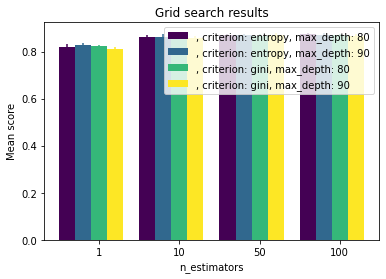

In [35]:
# you can also use bars
grid_search(dataku.cv_results_, change='n_estimators', kind='bar')
plt.show()

SVM

In [36]:
#SVM Tuning Parameters

X = data['w2v'].tolist()
y = data['Labeling']

over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

param_grid = {
    'C': [1.0, 2.0],
    'kernel': ['linear', 'rbf'],
    'degree': [1, 2, 3, 4]
}
# Create a based model
SVM = SVC()
# Instantiate the grid search model
dataku2 = GridSearchCV(estimator = SVM, param_grid = param_grid, scoring='f1', cv = 5)

In [38]:
dataku2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0], 'degree': [1, 2, 3, 4],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [39]:
dataku2.best_params_

{'C': 2.0, 'degree': 1, 'kernel': 'rbf'}

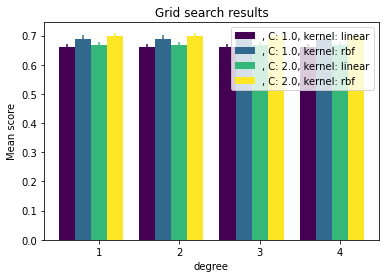

In [40]:
from sklearn_evaluation.plot import grid_search
from matplotlib import pyplot as plt
grid_search(dataku2.cv_results_, change='degree', kind='bar')
plt.show()

In [42]:
#SVM
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = data['w2v'].tolist()
y = data['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf')
SVM.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1").mean())

0.7227577520365179


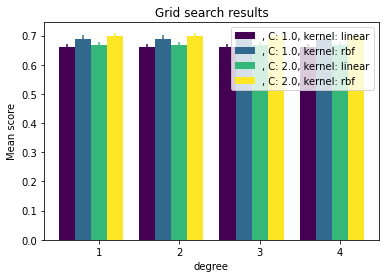

In [43]:
grid_search(dataku2.cv_results_, change='degree', kind='bar')
plt.show()

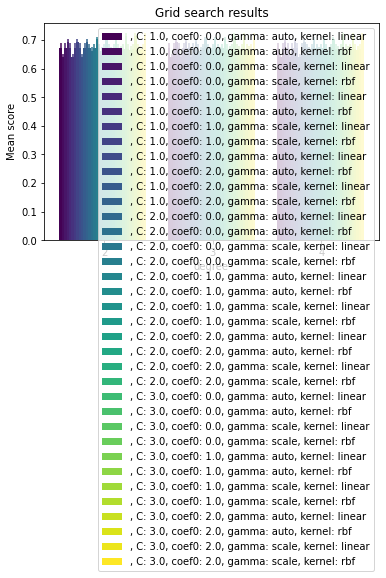

In [26]:
from sklearn_evaluation.plot import grid_search
from matplotlib import pyplot as plt
grid_search(dataku.cv_results_, change='degree', kind='bar')
plt.show()

Perbandingan Performa Model

In [44]:
#Model Default

X = data['w2v'].tolist()
y = data['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
RF = RandomForestClassifier()

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.92180313 0.92514036 0.92434838 0.92888064 0.92402718]
0.9248250322167724
[0.92147239 0.92489137 0.92297899 0.92921175 0.92345679]
0.9244704996024792
[0.92147239 0.92522495 0.92366412 0.92859351 0.92435937]
0.9249471131866572
[0.92147239 0.92388941 0.92400636 0.92815294 0.92378895]
0.9248779436910486


In [47]:
#Model dengan Tuning parameter RandomForest

X = data['w2v'].tolist()
y = data['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
RF = RandomForestClassifier(max_depth = 80, n_estimators = 100, criterion='entropy')

#ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.92722862 0.93287968 0.92727273 0.92839352 0.92473782]
0.9278417540686423
[0.92779126 0.93320965 0.9276089  0.92872705 0.92412091]
0.9281111817594037
[0.9262519  0.93320965 0.92693634 0.92839352 0.92506938]
0.9281064123351952
[0.9262519  0.93287968 0.92693634 0.92805979 0.92473782]
0.9278169312451799


In [48]:
#Model Default SVM

X = data['w2v'].tolist()
y = data['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
SVM = SVC()

#ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [SVM]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.70851461 0.69458128 0.70978018 0.70829391 0.68631179]
0.7014963543139006
[0.70851461 0.69458128 0.70978018 0.70829391 0.68631179]
0.7014963543139006
[0.70851461 0.69458128 0.70978018 0.70829391 0.68631179]
0.7014963543139006
[0.70851461 0.69458128 0.70978018 0.70829391 0.68631179]
0.7014963543139006


In [49]:
#Model dengan Tuning parameter SVM

X = data['w2v'].tolist()
y = data['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf')

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [SVM]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.6910828  0.71726755 0.72296865 0.72879177 0.7193926 ]
0.7159006751640372
[0.6910828  0.71726755 0.72296865 0.72879177 0.7193926 ]
0.7159006751640372
[0.6910828  0.71726755 0.72296865 0.72879177 0.7193926 ]
0.7159006751640372
[0.6910828  0.71726755 0.72296865 0.72879177 0.7193926 ]
0.7159006751640372


Model dengan Performa Terbaik

In [50]:
#Random Forest
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = data['w2v'].tolist()
y = data['Labeling']
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)
RF = RandomForestClassifier(max_depth = 80, n_estimators = 100, criterion='entropy')

In [51]:
#Random Forest
kFold = 5
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())

[0.91873235 0.92500784 0.93002824 0.92971447 0.92121783]
0.9253794497459173
[0.9185049  0.9173913  0.91692692 0.91155235 0.91002415]
0.9134403802408209
[0.92786683 0.94013863 0.94094994 0.95411691 0.93971411]
0.9370495845026747
[0.92061538 0.925      0.92820839 0.93177628 0.92444173]
0.9267697709627356


In [52]:
#SVM
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = data['w2v'].tolist()
y = data['Labeling']
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf')

In [53]:
#SVM
kFold = 5
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="recall").mean())

[0.70584478 0.73253619 0.71342431 0.71825648 0.70832005]
0.7156763600202661
[0.71101349 0.7332915  0.71666144 0.72011296 0.71280603]
0.7187770822733835
[0.73227303 0.73161534 0.70558694 0.72190476 0.72709424]
0.7236948620759456
[0.68125771 0.73345936 0.72143774 0.71464488 0.69049099]
0.708258134026644


Visualisasi ROC

In [57]:
X = data['w2v'].tolist()
y = data['Labeling']
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
# Membandingkan Decision Tree dengan berbagai train size
RF = RandomForestClassifier(max_depth = 80, n_estimators = 100, criterion='entropy')
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf', probability=True)

train_size = [0.7]
rforest = [RF, SVM]
for rf in rforest :
  for f in train_size :
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
    rf.fit(X_train, y_train)
    #score_test = rf.score(X_test, y_test)
    predict = rf.predict(X_test)
    score_test1 = metrics.f1_score(y_test, predict)
    if rf == RF: print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == SVM: print("F1-Score NB with Train size %.2f : %.3f%%" % (f, score_test1*100))

F1-Score Random Forest with Train size 0.70 : 91.779%
F1-Score NB with Train size 0.70 : 71.767%


In [13]:
X = data['w2v'].tolist()
y = data['Labeling']
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
# Membandingkan Decision Tree dengan berbagai train size
RF = RandomForestClassifier(max_depth = 80, n_estimators = 100, criterion='entropy')
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf', probability=True)

train_size = [0.7]
rforest = [RF, SVM]
for rf in rforest :
  for f in train_size :
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
    rf.fit(X_train, y_train)
    #score_test = rf.score(X_test, y_test)
    predict = rf.predict(X_test)
    score_test1 = metrics.f1_score(y_test, predict)
    if rf == RF: print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == SVM: print("F1-Score NB with Train size %.2f : %.3f%%" % (f, score_test1*100))

F1-Score Random Forest with Train size 0.70 : 91.822%
F1-Score NB with Train size 0.70 : 69.895%


In [14]:
rf_probs1 = RF.predict_proba(X_test)
rf_probs1 = rf_probs1[:, 1]
svm_probs1 = SVM.predict_proba(X_test)
svm_probs1 = svm_probs1[:, 1]

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [68]:
rf_auc1 = roc_auc_score(y_test,rf_probs1)
svm_auc1 = roc_auc_score(y_test,svm_probs1)

print('Random Forest = %.3f' % (rf_auc1))
print('SVM = %.3f' % (svm_auc1))


Random Forest = 0.964
SVM = 0.775


In [16]:
rf_auc1 = roc_auc_score(y_test,rf_probs1)
svm_auc1 = roc_auc_score(y_test,svm_probs1)

print('Random Forest = %.3f' % (rf_auc1))
print('SVM = %.3f' % (svm_auc1))


Random Forest = 0.965
SVM = 0.777


In [17]:
rf_rpr1, rf_tpr1, _ = roc_curve(y_test, rf_probs1)
nb_rpr1, nb_tpr1, _ = roc_curve(y_test, svm_probs1)

In [19]:
import matplotlib.pyplot as plt

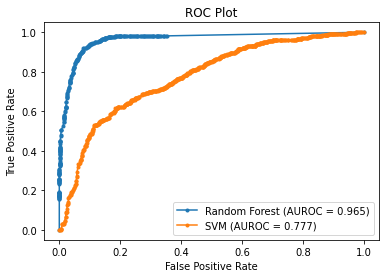

In [20]:
plt.plot(rf_rpr1, rf_tpr1, marker= '.', label = 'Random Forest (AUROC = %0.3f)' % rf_auc1)
plt.plot(nb_rpr1, nb_tpr1, marker= '.', label = 'SVM (AUROC = %0.3f)' % svm_auc1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()